# ECCOv4r3 budgets
Evaluating budgets in the ECCOv4 (release 3) model run using xgcm.

This notebook is based on the calculations and MATLAB code in evaluating_budgets_in_eccov4r3.pdf by Christopher G. Piecuch (ftp://ecco.jpl.nasa.gov/Version4/Release3/doc/evaluating_budgets_in_eccov4r3.pdf).

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from xmitgcm import open_mdsdataset
import xgcm

import matplotlib.pyplot as plt
%matplotlib inline

## Define plotting funtion

In [2]:
def quick_llc_plot(data, axis_off=False, **kwargs):
    face_to_axis = {0: (2, 0), 1: (1, 0), 2: (0, 0),
                    3: (2, 1), 4: (1, 1), 5: (0, 1),
                    7: (0, 2), 8: (1, 2), 9: (2, 2),
                    10: (0, 3), 11: (1, 3), 12: (2, 3)}
    transpose = [7, 8, 9, 10, 11, 12]
    gridspec_kw = dict(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    fig, axes = plt.subplots(nrows=3, ncols=4, gridspec_kw=gridspec_kw, figsize=(10,4))
    for face, (j, i) in face_to_axis.items():
        data_ax = data.sel(face=face)
        ax = axes[j,i]
        yincrease = True
        if face in transpose:
            data_ax = data_ax.transpose()
            yincrease = False
        p = data_ax.plot(ax=ax, yincrease=yincrease, **kwargs)
        if axis_off:
            ax.axis('off')
        ax.set_title('')
    # use implicit way
    cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.95)

## Load datasets

**Note**: Model output is saved into files with 4 different prefixes depending on whether the variable is averaged (`ave`) or a snapshot (`snp`) and whether it is 2D or 3D. Reference date and time step are defined to get appropriate time points. ECCOv4r3 solution has been run from 1992 to 2015.

In [3]:
ds_ave = open_mdsdataset('/rigel/ocp/users/jt2796/MITgcm/mysetups/ECCO_v4_r3/run/',
                         delta_t=3600, ref_date='1991-12-15 12:0:0', geometry='llc',
                         prefix=['monave2d','monave3d'])

/rigel/home/jt2796/miniconda/envs/default/lib/python2.7/site-packages/xmitgcm-0.2.1-py2.7.egg/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [4]:
ds_snp = open_mdsdataset('/rigel/ocp/users/jt2796/MITgcm/mysetups/ECCO_v4_r3/run/',
                         delta_t=3600, ref_date='1992-1-1 12:0:0', geometry='llc',
                         prefix=['monsnp2d','monsnp3d'])

### Geothermal flux

In [5]:
geoflx = np.fromfile('/rigel/ocp/users/jt2796/ECCO_v4_r2/geothermalFlux.bin', dtype=np.float32)

**Note**: Geothermal flux dataset needs to be saved as an xarray data array with the same format as the model output. In order to reformat the loaded data array the byte-ordering needs to be changed.

In [6]:
# Data and type endianness don't match. Change data to match dtype and reshape to 1d
geoflx = geoflx.byteswap().reshape([105300,1])

In [7]:
# Reshape data for each face and save as xarray data array in LLC format
geoflx00 = xr.DataArray(geoflx[:8100,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx01 = xr.DataArray(geoflx[8100:16200,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx02 = xr.DataArray(geoflx[16200:24300,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx03 = xr.DataArray(geoflx[24300:32400,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx04 = xr.DataArray(geoflx[32400:40500,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx05 = xr.DataArray(geoflx[40500:48600,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])
geoflx06 = xr.DataArray(geoflx[48600:56700,0].reshape([90,90]),coords=[np.arange(0,90,1),np.arange(0,90,1)],
                        dims=['j','i'])

geoflx0709 = geoflx[56700:81000,0].reshape([90,270])
geoflx07 = xr.DataArray(geoflx0709[:,:90],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx08 = xr.DataArray(geoflx0709[:,90:180],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx09 = xr.DataArray(geoflx0709[:,180:],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])

geoflx1012 = geoflx[81000:,0].reshape([90,270])
geoflx10 = xr.DataArray(geoflx1012[:,:90],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx11 = xr.DataArray(geoflx1012[:,90:180],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])
geoflx12 = xr.DataArray(geoflx1012[:,180:],coords=[np.arange(0,90,1),np.arange(0,90,1)],dims=['j','i'])

In [8]:
geoflx_llc = xr.concat([geoflx00,geoflx01,geoflx02,geoflx03,geoflx04,geoflx05,geoflx06,
                        geoflx07,geoflx08,geoflx09,geoflx10,geoflx11,geoflx12], 'face')

**Note**: Geothermal flux needs to be a three dimensional field since the sources are distributed along the ocean floor at various depths. This requires a three dimensional mask (see below).

## Adjust times (optional)
**Note**: This code can be run to update the time axis to a certain common format. It is used here to be able to compare budget terms with other datasets (e.g., standard output from ECCOv4 netcdf files). Here, the time axis is defined for monthly averages to have time points always at the same day in the middle of the month (day=15).

In [9]:
ds_ave['time'] = pd.date_range(start='1992-01-15', periods=2*24*12, freq='SMS')[::2]

## Subset

In [10]:
tstart = '1992-01-15'
tend = '1995-12-15'

In [11]:
ds_ave = ds_ave.sel(time=slice(tstart,tend))
ds_snp = ds_snp.sel(time=slice(tstart,tend))

## Define terms
Before doing the budget calculations we need to define some terms that will be used in the budget calculations

### Number of seconds between each snapshot
**Note**: There are no snapshots for the first and last time point. Thus, we are skipping budget calculations for first and last month of the given time period.

In [12]:
dt = ds_snp.time[1:].load()
# delta t in seconds. Note: devide by 10**9 to convert nanoseconds to seconds
dt.values = [float(t)/10**9 for t in np.diff(ds_snp.time)]

# time axis of dt should be the same as of the monthly averages
dt.time.values = ds_ave.time[1:-1].values

### Relevant constants

In [13]:
# Density kg/m^3
rhoconst = 1029

# Heat capacity (J/kg/K)
c_p = 3994

# Constants for surface heat penetration (from Table 2 of Paulson and Simpson, 1977)
R = 0.62
zeta1 = 0.6
zeta2 = 20.0

### Ocean depth

In [14]:
# Ocean depth (m)
Depth = ds_snp.Depth.load()

### Grid dimensions

In [15]:
dxG = ds_ave.dxG.load()
dyG = ds_ave.dyG.load()
drF = ds_ave.drF.load()

In [16]:
rA = ds_ave.rA.load()
hFacC = ds_ave.hFacC.load()

In [17]:
# Volume (m^3)
vol = (rA*drF*hFacC).transpose('face','k','j','i')

### Land mask 

In [18]:
# Make copy of hFacC
mskC = hFacC.copy(deep=True).load()

# Change all fractions (ocean) to 1. land = 0
mskC.values[mskC.values>0] = 1

In [19]:
# Make 2D land mask for surface (This is just for plotting/mapping purposes)
land_mask = mskC[0]
land_mask.values[land_mask.values==0] = np.nan

### Creating the grid object

In [20]:
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

In [21]:
grid = xgcm.Grid(ds_ave, face_connections=face_connections)

## Evaluating the volume budget
$$G^{\eta,tot} = G^{\eta,conv} + G^{\eta,forc}$$
$$\frac{1}{H}\frac{\partial \eta}{\partial t} = -\nabla_{z^*}(s^*\,{\bf v}) - \frac{\partial w}{\partial z^*} + s^*\,F$$

### Total tendency
- ETAN: Surface Height Anomaly (m)

In [22]:
# Load snapshots for surface height anomaly from dataset
ETANsnp = ds_snp.ETAN.load()

In [23]:
# Total tendency (1/month)
tendV_perMonth = (xr.DataArray(50*[1],coords={'k': np.array(range(0,50))},dims=['k'])*\
                  (1/Depth)*(ETANsnp.shift(time=-1)-ETANsnp)).transpose('time','face','k','j','i')[:-1]

/rigel/home/jt2796/miniconda/envs/default/lib/python2.7/site-packages/xarray/core/variable.py:1165: RuntimeWarning: divide by zero encountered in divide
  else f(other_data, self_data))
/rigel/home/jt2796/miniconda/envs/default/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in multiply
  if not reflexive


In [24]:
# Make sure time axis is the same as for the monthly variables
tendV_perMonth.time.values = ds_ave.time[1:-1].values

In [25]:
# Convert tendency from 1/month to 1/s
tendV_perSec = tendV_perMonth/dt

In [26]:
# Predefine tendV array with correct dimensions
tendV = xr.DataArray(np.nan*np.zeros([np.shape(tendV_perSec)[0]+2,13,50,90,90]),
                     coords={'time': range(np.shape(tendV_perSec)[0]+2),'face': np.array(range(0,13)),
                             'k': np.array(range(0,50)),'j': np.array(range(0,90)),
                             'i': np.array(range(0,90))},dims=['time','face','k','j','i'])

# Time
tendV.time.values = ds_ave.time.values

# Add coordinates
tendV['XC'] = ds_snp.XC
tendV['YC'] = ds_snp.YC
tendV['Z'] = ds_snp.Z

In [27]:
# Total tendency (1/s)
tendV.values[1:-1] = tendV_perSec.values

### Forcing
- oceFWflx: net surface Fresh-Water flux into the ocean (kg/m^2/s)

In [28]:
# Load monthly averaged freshwater flux
oceFWflx = ds_ave.oceFWflx.load()

In [29]:
# Sea surface forcing on volume (1/s)
forcV = ((oceFWflx/rhoconst)/(hFacC*drF)).transpose('time','face','k','j','i')

/rigel/home/jt2796/miniconda/envs/default/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: divide by zero encountered in divide
  if not reflexive
/rigel/home/jt2796/miniconda/envs/default/lib/python2.7/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in divide
  if not reflexive


In [30]:
# Make sure forcing term is zero below the surface
forcV.values[:,:,1:] = 0*forcV.values[:,:,1:]

/rigel/home/jt2796/miniconda/envs/default/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


### Horizontal convergence
- UVELMASS: U Mass-Weighted Comp of Velocity (m/s)
- VVELMASS: V Mass-Weighted Comp of Velocity (m/s)

In [31]:
# Load monthly averaged velocities (here: only one face is used)
UVELMASS = ds_ave.UVELMASS.load()
VVELMASS = ds_ave.VVELMASS.load()

**Note**: Volume transports are calculated the same way as in the xgcm example (http://xgcm.readthedocs.io/en/latest/example_mitgcm.html#Divergence-Calculation). The only difference here is the omission of `hFacW` and `hFacS`. Including `hFacW` and `hFacS` in the calculation of the transport terms introduces unrealistic artifacts in the horizontal convergence near the ocean floor, which in turn causes the volume budget to be not balanced in the deeper ocean layers.

In [32]:
# Horizontal volume transports (m^3/s)
u_transport = UVELMASS * dyG * drF
v_transport = VVELMASS * dxG * drF

In [33]:
uv_diff = grid.diff_2d_vector({'X' : u_transport, 'Y' : v_transport}, boundary = 'fill')

In [34]:
u_diffx = uv_diff['X']
v_diffy = uv_diff['Y']

In [35]:
# Convergence of the horizontal flow (1/s)
hConvV = (-(u_diffx + v_diffy)/vol).transpose('time','face','k','j','i')

### Vertical convergence
- WVELMASS: Vertical Mass-Weighted Comp of Velocity (m/s)

In [36]:
# Load monthly averaged vertical velocity
WVELMASS = ds_ave.WVELMASS.load().transpose('time','face','k_l','j','i')

In [37]:
# Vertical volume transport (m^3/s)
w_transport = (WVELMASS * rA).transpose('time','face','k_l','j','i')

**Note**: Apparently, it is required to add the vertical volume flux at the air-sea interface (`oceFWflx`) to the surface layer to balance the budget.

In [38]:
# Add the vertical volume flux at the air-sea interface
w_transport[:,:,0] = w_transport[:,:,0]+(forcV*vol)[:,:,0]

In [39]:
# Convergence of the vertical flow (m^3/s)
vConvV = grid.diff(w_transport, 'Z', boundary='fill')

**Note**: Convergence in the deepest depth layer in `vConvV` needs to be replaced by minus the vertical volume flux. Otherwise, the volume budget in the deepest layer will be unbalanced. This is probably an issue with the given way `grid.diff()` calculates values at the edges.

In [40]:
vConvV[:,:,-1,:,:] = -w_transport[:,:,-1,:,:]

In [41]:
# Convergence of the vertical flow (1/s)
vConvV = vConvV/vol

### Total convergence

In [42]:
ConvV = hConvV+vConvV

### Total tendency

In [43]:
totalV = ConvV + forcV

### Map accumulated residual in volume budget 

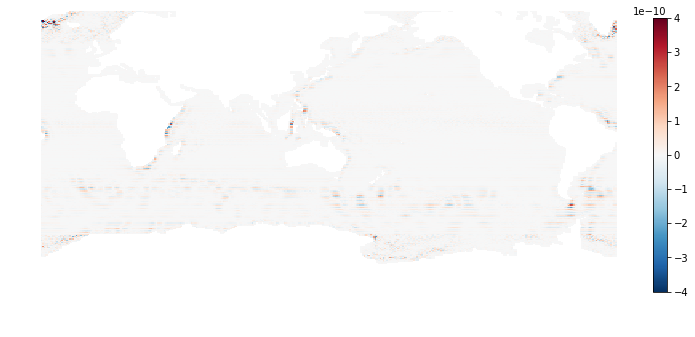

In [50]:
quick_llc_plot((totalV-tendV).sum(dim='k').sum(dim='time')*land_mask, 
               add_colorbar=False, axis_off=True, cmap='RdBu_r',vmin=-4e-10,vmax=4e-10)

#### Arctic cap

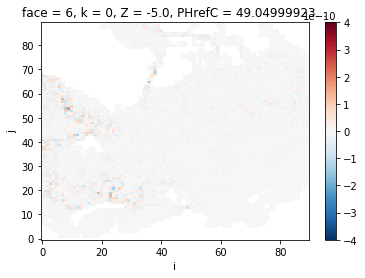

In [51]:
((totalV[:,6]-tendV[:,6]).sum(dim='k').sum(dim='time')*land_mask[6]).plot(cmap='RdBu_r',vmin=-4e-10,vmax=4e-10)

**Note**: The residuals are larger when doing the calculations on Unix (on Habanero) compared to Mac OS. When running the code on Unix, there is some bias in the horizontal convergence term (`hConvV`), but it is very small.

### Time series for an arbitrarily chosen grid point

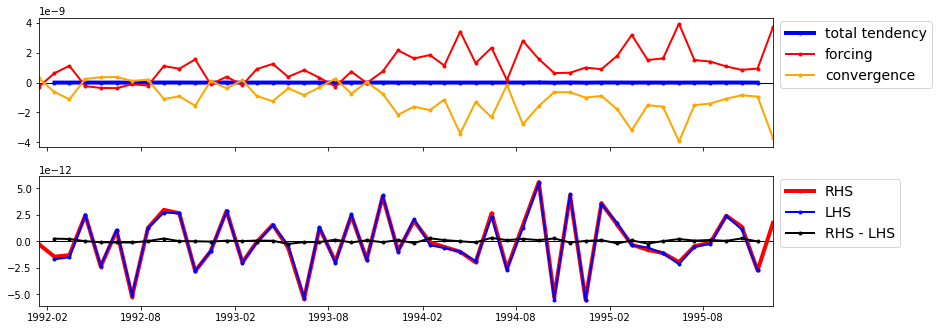

In [52]:
f = 1
k = 0
j = 10
i = 10

fig, axes = plt.subplots(2, 1,figsize=(12,5))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(tendV.time, tendV[:,f,k,j,i], lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcV.time, forcV[:,f,k,j,i], lw=2, color='red', marker='.',label='forcing')
plt.plot(ConvV.time, ConvV[:,f,k,j,i], lw=2, color='orange', marker='.',label='convergence')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.setp(plt.gca(), 'xticklabels',[])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

plt.subplot(2, 1, 2)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(totalV.time, totalV[:,f,k,j,i], lw=4, color='red', marker='.',label='RHS')
plt.plot(tendV.time, tendV[:,f,k,j,i], lw=2, color='blue', marker='.',label='LHS')
plt.plot(tendV.time, totalV[:,f,k,j,i]-tendV[:,f,k,j,i], lw=2, color='k', marker='.',label='RHS - LHS')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.9)
plt.show()

### Verical profiles for an arbitrarily chosen grid point

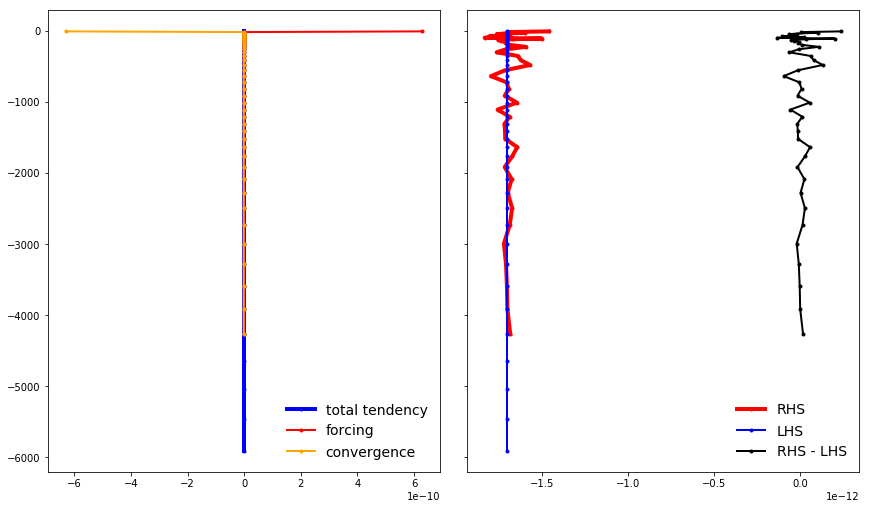

In [53]:
t = 1
f = 1
j = 10
i = 10

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,7))
fig.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(tendV[t,f,:,j,i],tendV.Z, lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcV[t,f,:,j,i],forcV.Z, lw=2, color='red', marker='.',label='forcing')
plt.plot(ConvV[t,f,:,j,i],ConvV.Z, lw=2, color='orange', marker='.',label='convergence')
plt.legend(loc='lower right',frameon=False,fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(totalV[t,f,:,j,i],totalV.Z, lw=4, color='red', marker='.',label='RHS')
plt.plot(tendV[t,f,:,j,i],tendV.Z, lw=2, color='blue', marker='.',label='LHS')
plt.plot(totalV[t,f,:,j,i]-tendV[t,f,:,j,i],totalV.Z, lw=2, color='k', marker='.',label='RHS - LHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.legend(loc='lower right',frameon=False,fontsize=14)

plt.show()

## Evaluating the heat budget
$$G^{\theta,tot} = G^{\theta,adv} + G^{\theta,forc} + G^{\theta,diff}$$
$$\frac{\partial(s^*\theta)}{\partial t} = -\nabla_{z^*}(s^*\,\theta\,{\bf v_{res}}) - \frac{\partial(\theta\,w_{res})}{\partial z^*} + s^*\,F_{\theta} + s^*\,D_{\theta}$$

### Total tendency
- THETA: Potential Temperature (degC)

In [54]:
# Load snapshots of theta
THETAsnp = ds_snp.THETA.load()

In [55]:
# Calculate the s∗theta term
HCsnp = (THETAsnp*(1+ETANsnp/Depth)).transpose('time','face','k','j','i')

In [56]:
# Total tendency (degC/month)
tendH_perMonth = (HCsnp.shift(time=-1)-HCsnp)[:-1]

In [57]:
# Make sure time axis is the same as for the monthly variables
tendH_perMonth.time.values = ds_ave.time[1:-1].values

In [58]:
# Convert tendency from 1/month to 1/s
tendH_perSec = tendH_perMonth/dt

In [59]:
# Predefine tendH array with correct dimensions
tendH = xr.DataArray(np.nan*np.zeros([np.shape(tendH_perSec)[0]+2,13,50,90,90]),
                     coords={'time': range(np.shape(tendH_perSec)[0]+2),'face': np.array(range(0,13)),
                             'k': np.array(range(0,50)),'j': np.array(range(0,90)),
                             'i': np.array(range(0,90))},dims=['time','face','k','j','i'])

# Time
tendH.time.values = ds_ave.time.values

# Add coordinates
tendH['XC'] = ds_snp.XC
tendH['YC'] = ds_snp.YC
tendH['Z'] = ds_snp.Z

In [60]:
# Total tendency (degC/s)
tendH.values[1:-1] = tendH_perSec.values

### Forcing
- TFLUX: total heat flux (match heat-content variations) (W/m^2)
- oceQsw: net Short-Wave radiation (+=down) (W/m^2)

In [61]:
# Load monthly averages of heat flux and shortwave radiation
TFLUX = ds_ave.TFLUX.load()
oceQsw = ds_ave.oceQsw.load()

#### Defining terms needed for evaluating surface heat forcing

In [62]:
Z = ds_ave.Z.load()
RF = np.concatenate([ds_ave.Zp1.values[:-1],[np.nan]])

**Note**: `Z` and `Zp1` are used in deriving surface heat penetration. MATLAB code uses `RF` from `mygrid` structure.

In [63]:
q1 = R*np.exp(1.0/zeta1*RF[:-1]) + (1.0-R)*np.exp(1.0/zeta2*RF[:-1])
q2 = R*np.exp(1.0/zeta1*RF[1:]) + (1.0-R)*np.exp(1.0/zeta2*RF[1:])

In [64]:
# Correction for the 200m cutoff
zCut = np.where(Z < -200)[0][0]
q1[zCut:] = 0
q2[zCut-1:] = 0

In [65]:
# Save q1 and q2 as xarray data arrays
q1 = xr.DataArray(q1,coords=[Z.k],dims=['k'])
q2 = xr.DataArray(q2,coords=[Z.k],dims=['k'])

#### Compute vertically penetrating flux

In [66]:
# Surface heat flux (below the surface)
forcH = ((q1*(mskC==1)-q2*(mskC.shift(k=-1)==1))*oceQsw).transpose('time','face','k','j','i')

In [67]:
# Reset surface field to zero
forcH.values[:,:,0] = 0*forcH.values[:,:,0]

In [68]:
# Surface heat flux (at the sea surface)
forcH[:,:,0] = ((TFLUX - (1-(q1[0]-q2[0]))*oceQsw)*mskC[0]).transpose('time','face','j','i')

#### Add geothermal heat flux

In [69]:
# Create 3d bathymetry mask
mskC_shifted = mskC.shift(k=-1)

In [70]:
mskC_shifted.values[-1,:,:,:] = 0
mskb = mskC - mskC_shifted

In [71]:
# Create 3d field of geothermal heat flux
geoflx2d = geoflx_llc
geoflx3d = geoflx2d * mskb.transpose('face','k','j','i')
GEOFLX = geoflx3d.transpose('face','k','j','i')

In [72]:
# Add geothermal heat flux to forcing field and convert from W/m^2 to degC/s
forcH = ((forcH + GEOFLX)/(rhoconst*c_p))/(hFacC*drF)

### Advection
#### Horizontal convergence
- ADVx_TH: U Comp. Advective Flux of Pot.Temperature (degC m^3/s)
- ADVy_TH: V Comp. Advective Flux of Pot.Temperature (degC m^3/s)

In [73]:
# Load monthly averaged advective fluxes
ADVx_TH = ds_ave.ADVx_TH.load()
ADVy_TH = ds_ave.ADVy_TH.load()

In [74]:
ADVxy_diff = grid.diff_2d_vector({'X' : ADVx_TH, 'Y' : ADVy_TH}, boundary = 'fill')

In [75]:
ADVx_diffx = ADVxy_diff['X']
ADVy_diffy = ADVxy_diff['Y']

In [76]:
# Convergence of horizontal advection (degC/s)
adv_hConvH = (-(ADVx_diffx + ADVy_diffy)/vol).transpose('time','face','k','j','i')

#### Vertical convergence
- ADVr_TH: Vertical Advective Flux of Pot.Temperature (degC m^3/s)

**Note**: For `ADVr_TH`, `DFrE_TH` and `DFrI_TH`, we need to make sure that sequence of dimensions are consistent. When loading the fields use `.transpose('time','face','k_l','j','i')`. Otherwise, the divergences will be not correct (at least for face = 12).

In [77]:
# Load monthly averages of vertical advective flux
ADVr_TH = ds_ave.ADVr_TH.load().transpose('time','face','k_l','j','i')

**Note**: The heat budget only balances when the sea surface forcing is not added to the vertical advective flux (at the air-sea interface). This is different from the volume and salinity budget.

In [78]:
# Convergence of vertical advection (degC m^3/s)
adv_vConvH = grid.diff(ADVr_TH, 'Z', boundary='extend')

**Note**: Convergence in the deepest layer in `adv_vConvH` needs to be replaced by minus the vertical advective flux. Otherwise, the volume budget in the deepest layer will be unbalanced. This is probably an issue with the given way `grid.diff()` calculates values at the edges.

In [79]:
adv_vConvH[:,:,-1,:,:] = -ADVr_TH[:,:,-1,:,:]

In [80]:
# Convergence of vertical advection (degC/s)
adv_vConvH = (adv_vConvH/vol).transpose('time','face','k','j','i')

### Diffusion
#### Horizontal convergence
- DFxE_TH: U Comp. Diffusive Flux of Pot.Temperature (degC m^3/s)
- DFyE_TH: V Comp. Diffusive Flux of Pot.Temperature (degC m^3/s)

In [81]:
# Load monthly averages of diffusive fluxes
DFxE_TH = ds_ave.DFxE_TH.load()
DFyE_TH = ds_ave.DFyE_TH.load()

In [82]:
DFxyE_diff = grid.diff_2d_vector({'X' : DFxE_TH, 'Y' : DFyE_TH}, boundary = 'fill')

In [83]:
DFxE_diffx = DFxyE_diff['X']
DFyE_diffy = DFxyE_diff['Y']

In [84]:
# Convergence of horizontal diffusion (degC/s)
dif_hConvH = (-(DFxE_diffx + DFyE_diffy)/vol).transpose('time','face','k','j','i')

#### Vertical convergence
- DFrE_TH: Vertical Diffusive Flux of Pot.Temperature (Explicit part) (degC m^3/s)
- DFrI_TH: Vertical Diffusive Flux of Pot.Temperature (Implicit part) (degC m^3/s)

In [85]:
# Load monthly averages of vertical diffusive fluxes
DFrE_TH = ds_ave.DFrE_TH.load().transpose('time','face','k_l','j','i')
DFrI_TH = ds_ave.DFrI_TH.load().transpose('time','face','k_l','j','i')

In [86]:
# Convergence of vertical diffusion (degC m^3/s)
dif_vConvH = grid.diff(DFrE_TH, 'Z', boundary='extend') + grid.diff(DFrI_TH, 'Z', boundary='extend')

**Note**: Convergence in the deepest layer in `dif_vConvH` needs to be replaced by minus the vertical diffusive flux to balance the budget.

In [87]:
dif_vConvH[:,:,-1,:,:] = -(DFrE_TH+DFrI_TH)[:,:,-1,:,:]

In [88]:
# Convergence of vertical diffusion (degC/s)
dif_vConvH = (dif_vConvH/vol).transpose('time','face','k','j','i')

### Total convergences

In [89]:
# Total convergence of advective flux
adv_ConvH = adv_hConvH + adv_vConvH

# Total convergence of diffusive flux
dif_ConvH = dif_hConvH + dif_vConvH

# Total convergence
ConvH = adv_ConvH + dif_ConvH

### Total tendency

In [90]:
totalH = ConvH + forcH

### Map accumulated residual in heat budget 

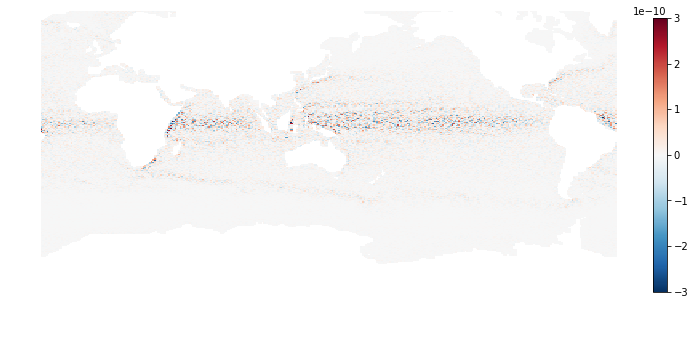

In [125]:
quick_llc_plot((totalH-tendH).sum(dim='k').sum(dim='time')*land_mask, 
               add_colorbar=False, axis_off=True, cmap='RdBu_r',vmin=-3e-10,vmax=3e-10)

#### Arctic cap

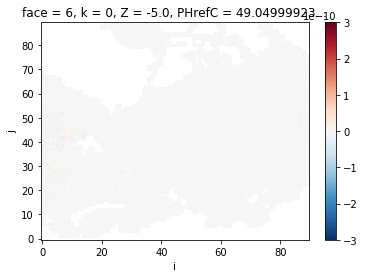

In [126]:
((totalH[:,6]-tendH[:,6]).sum(dim='k').sum(dim='time')*land_mask[6]).plot(cmap='RdBu_r',vmin=-3e-10,vmax=3e-10)

### Time series for an arbitrarily chosen grid point

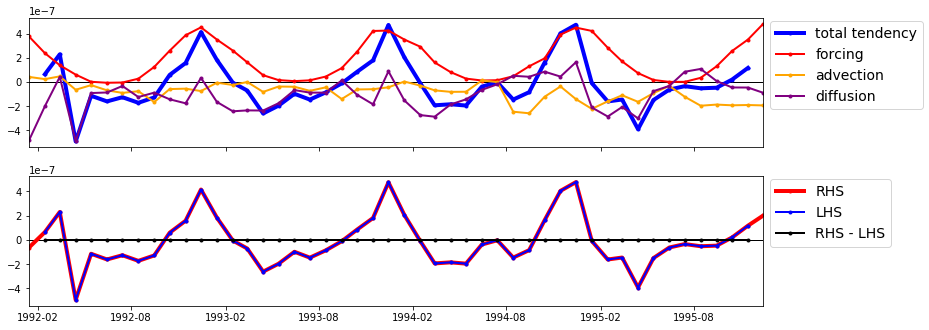

In [127]:
f = 12
k = 1
j = 10
i = 10

fig, axes = plt.subplots(2, 1,figsize=(12,5))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(tendH.time, tendH[:,f,k,j,i], lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcH.time, forcH[:,f,k,j,i], lw=2, color='red', marker='.',label='forcing')
plt.plot(adv_ConvH.time, adv_ConvH[:,f,k,j,i], lw=2, color='orange', marker='.',label='advection')
plt.plot(dif_ConvH.time, dif_ConvH[:,f,k,j,i], lw=2, color='purple', marker='.',label='diffusion')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.setp(plt.gca(), 'xticklabels',[])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

plt.subplot(2, 1, 2)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(totalH.time, totalH[:,f,k,j,i], lw=4, color='red', marker='.',label='RHS')
plt.plot(tendH.time, tendH[:,f,k,j,i], lw=2, color='blue', marker='.',label='LHS')
plt.plot(tendH.time, totalH[:,f,k,j,i]-tendH[:,f,k,j,i], lw=2, color='k', marker='.',label='RHS - LHS')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.9)
plt.show()

### Verical profiles for an arbitrarily chosen grid point

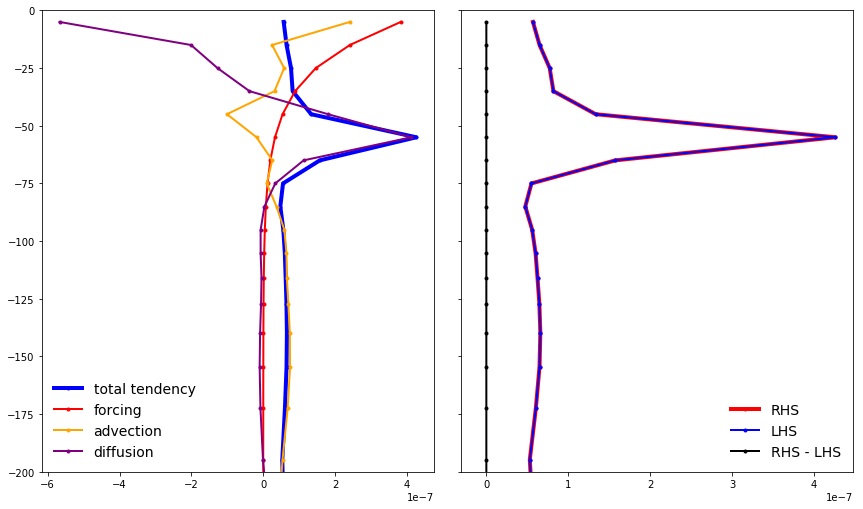

In [128]:
t = 1
f = 12
j = 10
i = 10

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,7))
fig.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(tendH[t,f,:,j,i],tendH.Z, lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcH[t,f,:,j,i],forcH.Z, lw=2, color='red', marker='.',label='forcing')
plt.plot(adv_ConvH[t,f,:,j,i],adv_ConvH.Z, lw=2, color='orange', marker='.',label='advection')
plt.plot(dif_ConvH[t,f,:,j,i],dif_ConvH.Z, lw=2, color='purple', marker='.',label='diffusion')
plt.legend(loc='lower left',frameon=False,fontsize=14)
plt.ylim([-200,0])

plt.subplot(1, 2, 2)
plt.plot(totalH[t,f,:,j,i],totalH.Z, lw=4, color='red', marker='.',label='RHS')
plt.plot(tendH[t,f,:,j,i],tendH.Z, lw=2, color='blue', marker='.',label='LHS')
plt.plot(totalH[t,f,:,j,i]-tendH[t,f,:,j,i],tendH.Z, lw=2, color='k', marker='.',label='RHS - LHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.legend(loc='lower right',frameon=False,fontsize=14)
plt.ylim([-200,0])

plt.show()

## Evaluating the salt budget
$$G^{S,tot} = G^{S,adv} + G^{S,forc} + G^{S,diff}$$
$$\frac{\partial(s^*S)}{\partial t} = -\nabla_{z^*}(s^*\,S\,{\bf v_{res}}) - \frac{\partial(S\,w_{res})}{\partial z^*} + s^*\,F_S + s^*\,D_S$$

### Total tendency
- SALT: Salinity (psu)

In [92]:
# Load salinity snapshot
SALTsnp = ds_snp.SALT.load()

In [93]:
# Calculate s*S term
sSALT = (SALTsnp*(1+ETANsnp/Depth)).transpose('time','face','k','j','i')

In [94]:
# Total tendency (psu/month)
tendS_perMonth = ((sSALT.shift(time=-1)-sSALT)[:-1])

In [95]:
# Make sure time axis is the same as for the monthly variables
tendS_perMonth.time.values = ds_ave.time[1:-1].values

In [96]:
# Convert tendency from 1/month to 1/s
tendS_perSec = tendS_perMonth/dt

In [97]:
# Predefine tendS array with correct dimensions
tendS = xr.DataArray(np.nan*np.zeros([np.shape(tendS_perSec)[0]+2,13,50,90,90]),
                     coords={'time': range(np.shape(tendS_perSec)[0]+2),'face': np.array(range(0,13)),
                             'k': np.array(range(0,50)),'j': np.array(range(0,90)),
                             'i': np.array(range(0,90))},dims=['time','face','k','j','i'])

# Time
tendS.time.values = ds_ave.time.values

# Add coordinates
tendS['XC'] = ds_snp.XC
tendS['YC'] = ds_snp.YC
tendS['Z'] = ds_snp.Z

In [98]:
# Total tendency (psu/s)
tendS.values[1:-1] = tendS_perSec.values

### Forcing
- SFLUX: total salt flux (match salt-content variations) (g/m^2/s)
- oceSPtnd: salt tendency due to salt plume flux (g/m^2/s)

In [99]:
# Load monthly averaged SFLUX and oceSPtnd (here only one face is used)
SFLUX = ds_ave.SFLUX.load()
oceSPtnd = ds_ave.oceSPtnd.load().transpose('time','face','k','j','i')

In [100]:
# Expand SFLUX along depth axis (k)
SFLUX3d = xr.concat(50*[SFLUX.expand_dims('k',1)],dim='k').transpose('time','face','k','j','i')
SFLUX3d.coords['k'] = SFLUX3d.k

In [101]:
# Reset SFLUX3d to zero below surface layer
SFLUX3d.values[:,:,1:] = 0*SFLUX3d[:,:,1:].values

**Note**: `SFLUX` and `oceSPtnd` is given in g/m^2/s. Dividing by density and corresponding vertical length scale (`drF`) results in g/kg/s, which is the same as psu/s.

In [102]:
# Surface salt flux (psu/s)
forcS = (((SFLUX3d+oceSPtnd)/rhoconst)/(hFacC*drF)).transpose('time','face','k','j','i')

### Advection
#### Horizontal convergence
- ADVx_SLT: U Comp. Advective Flux of Salinity (psu m^3/s)
- ADVy_SLT: V Comp. Advective Flux of Salinity (psu m^3/s)

In [103]:
# Load monthly averaged advective fluxes
ADVx_SLT = ds_ave.ADVx_SLT.load()
ADVy_SLT = ds_ave.ADVy_SLT.load()

In [104]:
ADVxy_SLT_diff = grid.diff_2d_vector({'X' : ADVx_SLT, 'Y' : ADVy_SLT}, boundary = 'fill')

In [105]:
ADVx_SLT_diffx = ADVxy_SLT_diff['X']
ADVy_SLT_diffy = ADVxy_SLT_diff['Y']

In [106]:
# Convergence of horizontal advection (psu/s)
adv_hConvS = (-(ADVx_SLT_diffx + ADVy_SLT_diffy)/vol).transpose('time','face','k','j','i')

#### Vertical convergence
- ADVr_SLT: Vertical Advective Flux of Salinity (psu m^3/s)

In [107]:
# Load monthly averaged vertical advective flux
ADVr_SLT = ds_ave.ADVr_SLT.load().transpose('time','face','k_l','j','i')

**Note**: The salt budget only balances when the sea surface forcing is not added to the vertical salt flux (at the air-sea interface). This is different from the volume and salinity budget.

In [108]:
# Convergence of vertical advection (psu m^3/s)
adv_vConvS = grid.diff(ADVr_SLT, 'Z', boundary='fill')

**Note**: The deepest depth layer in `adv_vConvS` needs to be replaced by  minus the vertical advective flux. This is probably an issue with how `grid.diff()` calculates the edges.

In [109]:
adv_vConvS[:,:,-1,:,:] = -ADVr_SLT[:,:,-1,:,:]

In [110]:
# Convergence of vertical advection (psu/s)
adv_vConvS = (adv_vConvS/vol).transpose('time','face','k','j','i')

### Diffusion
#### Horizontal convergence
- DFxE_SLT: U Comp. Diffusive Flux of Salinity (psu m^3/s)
- DFyE_SLT: V Comp. Diffusive Flux of Salinity (psu m^3/s)

In [111]:
# Load monthly averaged horizontal diffusive fluxes
DFxE_SLT = ds_ave.DFxE_SLT.load()
DFyE_SLT = ds_ave.DFyE_SLT.load()

In [112]:
DFxyE_SLT_diff = grid.diff_2d_vector({'X' : DFxE_SLT, 'Y' : DFyE_SLT}, boundary = 'fill')

In [113]:
DFxE_SLT_diffx = DFxyE_SLT_diff['X']
DFyE_SLT_diffy = DFxyE_SLT_diff['Y']

In [114]:
# Convergence of horizontal diffusion (psu/s)
dif_hConvS = (-(DFxE_SLT_diffx + DFyE_SLT_diffy)/vol).transpose('time','face','k','j','i')

#### Vertical convergence
- DFrE_SLT: Vertical Diffusive Flux of Salinity (Explicit part) (psu m^3/s)
- DFrI_SLT: Vertical Diffusive Flux of Salinity (Implicit part) (psu m^3/s)

In [115]:
# Load monthly averaged vertical diffusive fluxes
DFrE_SLT = ds_ave.DFrE_SLT.load().transpose('time','face','k_l','j','i')
DFrI_SLT = ds_ave.DFrI_SLT.load().transpose('time','face','k_l','j','i')

In [116]:
# Convergence of vertical diffusion (psu m^3/s)
dif_vConvS = grid.diff(DFrE_SLT, 'Z', boundary='fill') + grid.diff(DFrI_SLT, 'Z', boundary='fill')

**Note**: The deepest depth layer in `dif_vConvS` needs to be calculated seperately. This is probably an issue with the given boundary condition in `grid.diff()`.

In [117]:
dif_vConvS[:,:,-1,:,:] = -(DFrE_SLT+DFrI_SLT)[:,:,-1,:,:]

In [118]:
# Convergence of vertical diffusion (psu/s)
dif_vConvS = (dif_vConvS/vol).transpose('time','face','k','j','i')

### Total convergences

In [119]:
# Total convergence of advective flux
adv_ConvS = adv_hConvS + adv_vConvS

# Total convergence of diffusive flux
dif_ConvS = dif_hConvS + dif_vConvS

# Total convergence
ConvS = adv_ConvS + dif_ConvS

### Total tendency

In [120]:
totalS = ConvS + forcS

### Plot accumulated residual in salt budget 

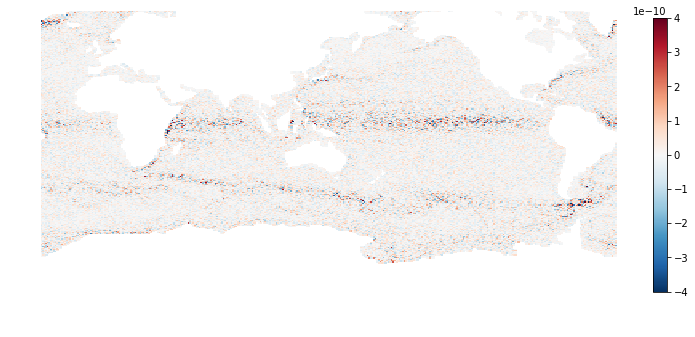

In [130]:
quick_llc_plot((totalS-tendS).sum(dim='k').sum(dim='time')*land_mask, 
               add_colorbar=False, axis_off=True, cmap='RdBu_r',vmin=-4e-10,vmax=4e-10)

#### Arctic cap

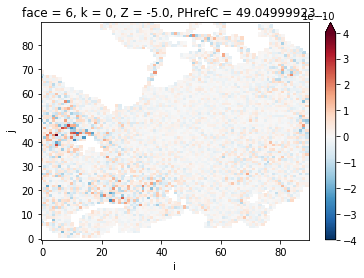

In [131]:
((totalS[:,6]-tendS[:,6]).sum(dim='k').sum(dim='time')*land_mask[6]).plot(cmap='RdBu_r',vmin=-4e-10,vmax=4e-10)

### Time series for an arbitrarily chosen grid point

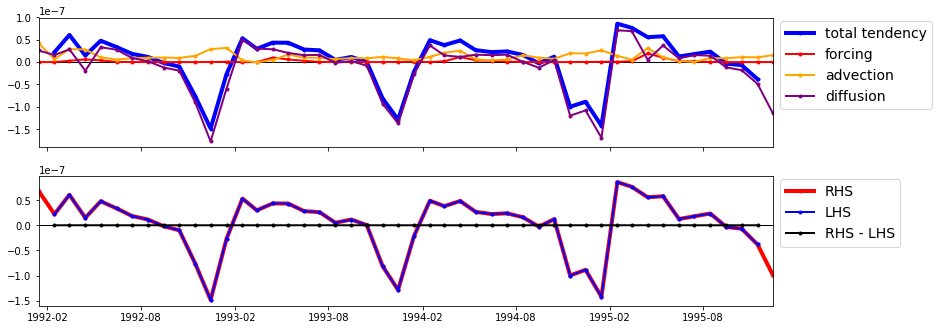

In [132]:
f = 0
k = 1
j = 75
i = 10

fig, axes = plt.subplots(2, 1,figsize=(12,5))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(tendS.time, tendS[:,f,k,j,i], lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcS.time, forcS[:,f,k,j,i], lw=2, color='red', marker='.',label='forcing')
plt.plot(adv_ConvS.time, adv_ConvS[:,f,k,j,i], lw=2, color='orange', marker='.',label='advection')
plt.plot(dif_ConvS.time, dif_ConvS[:,f,k,j,i], lw=2, color='purple', marker='.',label='diffusion')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.setp(plt.gca(), 'xticklabels',[])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

plt.subplot(2, 1, 2)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(totalS.time, totalS[:,f,k,j,i], lw=4, color='red', marker='.',label='RHS')
plt.plot(tendS.time, tendS[:,f,k,j,i], lw=2, color='blue', marker='.',label='LHS')
plt.plot(tendS.time, totalS[:,f,k,j,i]-tendS[:,f,k,j,i], lw=2, color='k', marker='.',label='RHS - LHS')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.9)
plt.show()

### Verical profiles for an arbitrarily chosen grid point

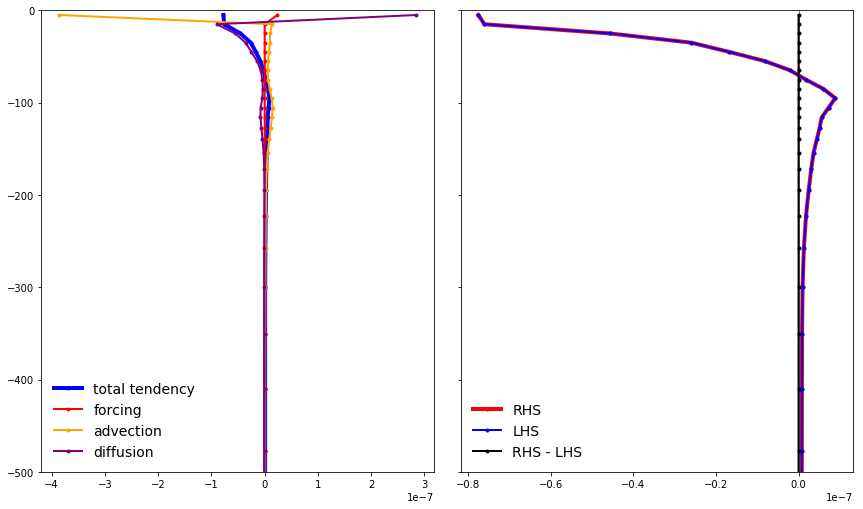

In [133]:
t = 10
f = 0
j = 75
i = 10

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,7))
fig.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(tendS[t,f,:,j,i], tendS.Z, lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcS[t,f,:,j,i], forcS.Z, lw=2, color='red', marker='.',label='forcing')
plt.plot(adv_ConvS[t,f,:,j,i], adv_ConvS.Z, lw=2, color='orange', marker='.',label='advection')
plt.plot(dif_ConvS[t,f,:,j,i], dif_ConvS.Z, lw=2, color='purple', marker='.',label='diffusion')
plt.legend(loc='lower left', frameon=False, fontsize=14)
plt.ylim([-500,0])
#plt.xlim([-2e-10,2e-10])

plt.subplot(1, 2, 2)
plt.axvline(x=0, ymin=0, ymax=1, linewidth=0.5, color = 'k')
plt.plot(totalS[t,f,:,j,i], totalS.Z, lw=4, color='red', marker='.',label='RHS')
plt.plot(tendS[t,f,:,j,i], tendS.Z, lw=2, color='blue', marker='.',label='LHS')
plt.plot(totalS[t,f,:,j,i]-tendS[t,f,:,j,i], tendS.Z, lw=2, color='k', marker='.',label='RHS - LHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.legend(loc='lower left',frameon=False,fontsize=14)
plt.ylim([-500,0])
#plt.xlim([-2e-10,2e-10])

plt.show()

## Evaluating the salinity budget
$$G^{Sln,tot} = G^{Sln,adv} + G^{Sln,forc} + G^{Sln,diff}$$
$$\frac{\partial S}{\partial t} = \frac{1}{s^*} \left[S\,\nabla_{z^*}(s^*\,{\bf v}) + S\,\frac{\partial w}{\partial z^*} - \nabla_{z^*}(s^*\,S\,{\bf v_{res}}) - \frac{\partial S\,w_{res}}{\partial z^*}\right] + D_S + F_S - S\,F$$

### Scale factor
- Depth: Ocean_depth (m)
- ETAN: Surface Height Anomaly (m)

In [134]:
# Load monthly averaged surface height anomaly
ETAN = ds_ave.ETAN.load()

In [135]:
# Scale factor
rstarfac = ((Depth + ETAN)/Depth).transpose('time','face','j','i')

### Total tendency

In [136]:
# Total tendency (psu/month)
tendSln_perMonth = ((SALTsnp.shift(time=-1)-SALTsnp)[:-1]).transpose('time','face','k','j','i')

In [137]:
# Make sure time axis is the same as for the monthly variables
tendSln_perMonth.time.values = ds_ave.time[1:-1].values

In [138]:
# Total tendency (psu/s)
tendSln_perSec = tendSln_perMonth/dt

In [139]:
# Predefine tendSln array with correct dimensions
tendSln = xr.DataArray(np.nan*np.zeros([np.shape(tendSln_perSec)[0]+2,13,50,90,90]),
                       coords={'time': range(np.shape(tendSln_perSec)[0]+2),'face': np.array(range(0,13)),
                               'k': np.array(range(0,50)),'j': np.array(range(0,90)),
                               'i': np.array(range(0,90))},dims=['time','face','k','j','i'])

# Time
tendSln.time.values = ds_ave.time.values

# Add coordinates
tendSln['XC'] = ds_snp.XC
tendSln['YC'] = ds_snp.YC
tendSln['Z'] = ds_snp.Z

In [140]:
# Total tendency (psu/s)
tendSln.values[1:-1] = tendSln_perSec.values

### Forcing
**Note**: The forcing term is comprised of both salt flux (`forcS`) and volume (i.e., freshwater) flux (`forcV`).
- SALT: Salinity (psu)

In [141]:
# Load monthly averaged salinity fields (here only one face is used)
SALT = ds_ave.SALT.load().transpose('time','face','k','j','i')

In [142]:
# Sea surface forcing for salinity (psu/s)
forcSln = ((-SALT*forcV + forcS)/rstarfac).transpose('time','face','k','j','i')

### Advection
#### Horizontal convergence

In [143]:
adv_hConvSln = ((-SALT*hConvV + adv_hConvS)/rstarfac).transpose('time','face','k','j','i')

#### Vertical convergence

In [144]:
adv_vConvSln = ((-SALT*vConvV + adv_vConvS)/rstarfac).transpose('time','face','k','j','i')

### Diffusion
#### Horizontal convergence

In [145]:
dif_hConvSln = dif_hConvS/rstarfac

#### Vertical convergence

In [146]:
dif_vConvSln = dif_vConvS/rstarfac

### Total convergences

In [147]:
# Total convergence of advective flux
adv_ConvSln = adv_hConvSln + adv_vConvSln

# Total convergence of diffusive flux
dif_ConvSln = dif_hConvSln + dif_vConvSln

# Total convergence
ConvSln = adv_ConvSln + dif_ConvSln

### Total tendency

In [148]:
totalSln = ConvSln + forcSln

### Plot Accumulated residual in salinity budget 

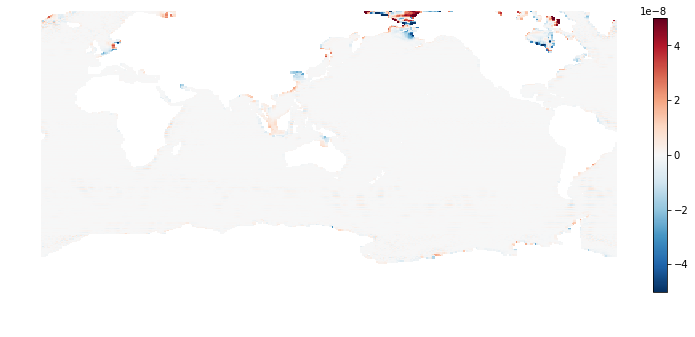

In [152]:
quick_llc_plot((totalSln-tendSln).sum(dim='k').sum(dim='time')*land_mask, 
               add_colorbar=False, axis_off=True, cmap='RdBu_r',vmin=-5e-8,vmax=5e-8)

#### Arctic cap

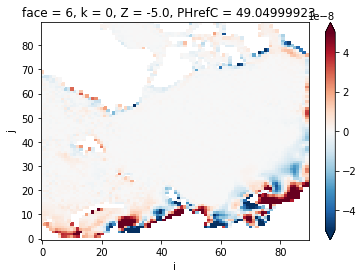

In [153]:
((totalSln[:,6]-tendSln[:,6]).sum(dim='k').sum(dim='time')*land_mask[6]).plot(cmap='RdBu_r',vmin=-5e-8,vmax=5e-8)

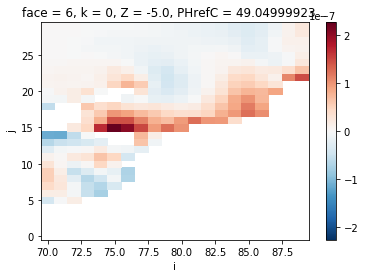

In [159]:
((totalSln[:,6,0:10,:30,70:]-tendSln[:,6,0:10,:30,70:]).sum(dim='k').sum(dim='time')*land_mask[6]).plot(cmap='RdBu_r')

In [171]:
(totalSln[:,6,0:10,15,75]-tendSln[:,6,0:10,15,75]).sum(dim='k').sum(dim='time')

<xarray.DataArray ()>
array(2.2554881886839152e-07)
Coordinates:
    j        int64 15
    i        int64 75
    face     int64 6
    XC       float32 142.969
    YC       float32 74.0298
    Depth    float32 19.99
    rA       float32 1.75833e+09

### Time series for an arbitrarily chosen grid point

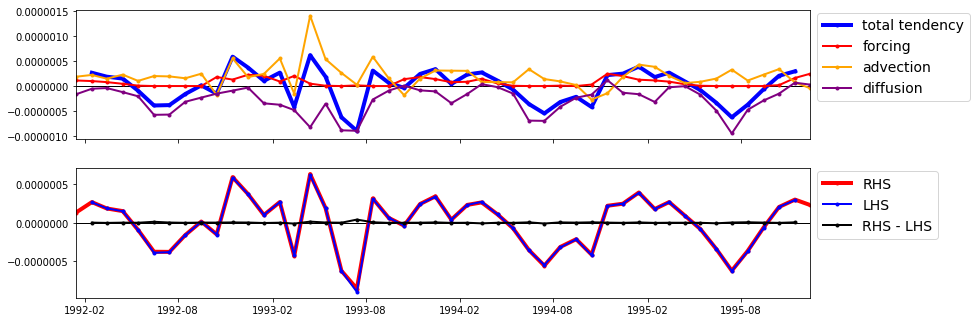

In [174]:
f = 6
k = 1
j = 15
i = 75

fig, axes = plt.subplots(2, 1,figsize=(12,5))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(tendSln.time, tendSln[:,f,k,j,i], lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcSln.time, forcSln[:,f,k,j,i], lw=2, color='red', marker='.',label='forcing')
plt.plot(adv_ConvSln.time, adv_ConvSln[:,f,k,j,i], lw=2, color='orange', marker='.',label='advection')
plt.plot(dif_ConvSln.time, dif_ConvSln[:,f,k,j,i], lw=2, color='purple', marker='.',label='diffusion')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.setp(plt.gca(), 'xticklabels',[])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

plt.subplot(2, 1, 2)
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
plt.plot(totalSln.time, totalSln[:,f,k,j,i], lw=4, color='red', marker='.',label='RHS')
plt.plot(tendSln.time, tendSln[:,f,k,j,i], lw=2, color='blue', marker='.',label='LHS')
plt.plot(tendSln.time, totalSln[:,f,k,j,i]-tendSln[:,f,k,j,i], lw=2, color='k', marker='.',label='RHS - LHS')
plt.xlim([ds_ave.time.values[0],ds_ave.time.values[-1]])
plt.legend(fontsize=14,bbox_to_anchor=(1.0, 1.03))

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.9)
plt.show()

### Verical profiles for an arbitrarily chosen grid point

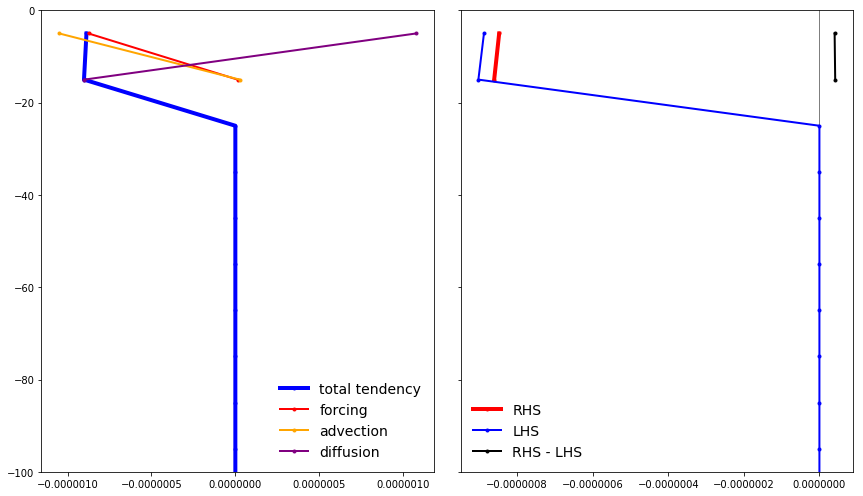

In [172]:
t = 18
f = 6
j = 15
i = 75

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,7))
fig.tight_layout()

plt.subplot(1, 2, 1)
plt.plot(tendSln[t,f,:,j,i],tendSln.Z, lw=4, color='blue', marker='.',label='total tendency')
plt.plot(forcSln[t,f,:,j,i],forcSln.Z, lw=2, color='red', marker='.',label='forcing')
plt.plot(adv_ConvSln[t,f,:,j,i],adv_ConvSln.Z, lw=2, color='orange', marker='.',label='advection')
plt.plot(dif_ConvSln[t,f,:,j,i],dif_ConvSln.Z, lw=2, color='purple', marker='.',label='diffusion')
plt.legend(loc='lower right',frameon=False,fontsize=14)
plt.ylim([-100,0])

plt.subplot(1, 2, 2)
plt.axvline(x=0, ymin=0, ymax=1, linewidth=0.5, color = 'k')
plt.plot(totalSln[t,f,:,j,i],totalSln.Z, lw=4, color='red', marker='.',label='RHS')
plt.plot(tendSln[t,f,:,j,i],tendSln.Z, lw=2, color='blue', marker='.',label='LHS')
plt.plot(totalSln[t,f,:,j,i]-tendSln[t,f,:,j,i],tendSln.Z, lw=2, color='k', marker='.',label='RHS - LHS')
plt.setp(plt.gca(), 'yticklabels',[])
plt.legend(loc='lower left',frameon=False,fontsize=14)
plt.ylim([-100,0])

plt.show()